In [7]:
#NEURAL NETWORKS 

#There is an input node which is connected to layers
#Each of these connections has a particular weight
#Every neuron has a connection to every single previous set of neurons 
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1]
#Each neuron has its own unique weight
bias = 2
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + 
inputs[3]*weights[3] + bias
print(output)
#This gives a brief idea of how neural networks hold information 


4.8


In [13]:
'''Inputs are features of a sample and we want to pass an entire 
batch of these to form different layers of neurons. The batch size is the number of 
inputs we give to the program at a time to fit the data.
If you are shown 1 neuron at a time, it can be a bit hard to fit. But its going to ge easier if you
show like...32 at a time.
If you show all samples at once, it leads to Overfitting which is not that great 
Usually have a batch size of 32 or 64. This varies with different problems =)'''
import numpy as np

inputs = [[1,2,3,2.5],
          [2,5,-1,2],
          [-1.5,2.7,3.3,-0.8]]

weights = [[0.2,0.8,-0.5,1],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]  #3x4 matrix

biases = [2, 3, 0.5]

#We want to transpose the weights matrix for the desired matrix multiplication
#To do this, we convert the weights matrix into a numpy array 
#to transpose, add a .T at the end of the numpy array
output = np.dot(inputs, np.array(weights).T) + biases

print(output)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [14]:
import numpy as np
#Now we add another layer to our program i.e another set of weights and biases 

inputs = [[1,2,3,2.5],
          [2,5,-1,2],
          [-1.5,2.7,3.3,-0.8]]

weights = [[0.2,0.8,-0.5,1],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]  #3x4 matrix

biases = [2, 3, 0.5]

#2nd layer
weights2 = [[0.1, -0.14, 0.5],
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]] 

biases2 = [-1, 2, -0.5]

#We want to transpose the weights matrix for the desired matrix multiplication
#To do this, we convert the weights matrix into a numpy array 
#to transpose, add a .T at the end of the numpy array
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
#These serve as inputs to the next layer
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


In [19]:
import numpy as np
np.random.seed(0)
#This is out training data set 
X = [[1,2,3,2.5],
     [2,5,-1,2],
     [-1.5,2.7,3.3,-0.8]] 

#Now we define the 2 hidden layers

class Layer_Dense: 
    def __init__(self, n_inputs, n_neurons):
        
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)        
        #We want to know what shape to pass into this. Basically, we need to know
        #the size of the input coming in and how many neurons we are going to be working with.
        #We take the matrix as inputs x neurons to avoid transposing everytime we access it.'''
        #randn is a gaussian distribution function bounded around 0
        
        self.biases = np.zeros((1,n_neurons))
       
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense(4,5) #From training data, we have 4 inputs per set but we can set neurons to anything
layer2 = Layer_Dense(5,2) #Again, first element has to be 5 since last neuron number was 5

layer1.forward(X)

layer2.forward(layer1.output)
print(layer2.output)

[[ 0.148296   -0.08397602]
 [ 0.14100315 -0.01340469]
 [ 0.20124979 -0.07290616]]


In [20]:
#Activation Functions 
'''Some Activation functions are Step function. Building on this, we 
take the Sigmoid function which makes the output more granular. We want to see
how close we were to outputting another input and this is achieved with the
sigmoid function. 
Another function is Rectified Linear Unit Activation Function. y=x for all x>0

A popular function is the completely linear y=x for all x. This is better than Sigmoid
function to get rid of the "vanishing gradient" problem. The linear function
is faster and relatively simpler than the sigmoid. It also just works =)
This is the most popular function to use in Hidden Layers in Neural Networks.

The bias determines at which point the neuron gets activated. The slope of this
function is based on its weight.

Consider a pair of neurons in the hidden layers
First neuron sets the Activation point and the slope
Second neuron is used to set the deactivation point
This simple methodology is used to demonstrate how a pair of neurons can fit
to a non- linear problem using non- linear activation functions'''

import numpy as np
np.random.seed(0) 
#Linear Activation Function Demonstration
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []
for i in inputs: 
    if i>0:
        output.append(i)
    elif i<=0:
        output.append(0)
        
        #Another way of doing the same thing 
        # output.append(max(0,i))
print(output)
        

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


Here


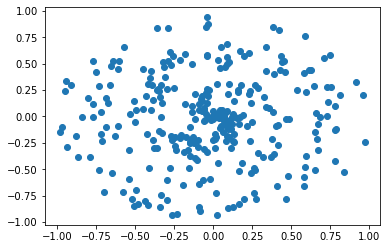

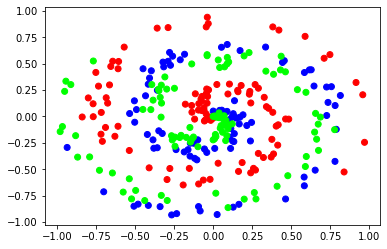

In [26]:
#Taken a Spiral Data Set from nnfs
import numpy as np 
np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points*classes,2))
    Y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0,1,points) #Radius
        t = np.linspace(class_number*4, (class_number+1)*4, points)+ np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        Y[ix] = class_number
    return X,Y
import matplotlib.pyplot as plt
print("Here")
X,Y = create_data(100,3)

plt.scatter(X[:,0],X[:,1])
plt.show()

plt.scatter(X[:,0],X[:,1],c=Y, cmap="brg")
plt.show()

        

In [29]:
import numpy as np
import nnfs 
from nnfs.datasets import spiral_data

nnfs.init()

X = [[1,2,3,2.5],
     [2,5,-1,2],
     [-1.5,2.7,3.3,-0.8]] 

X,y = spiral_data(100,3) #100 feature sets of 3 classes

class Layer_Dense: 
    def __init__(self, n_inputs, n_neurons):
        
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)        
#We want to know what shape to pass into this. Basically, we need to know
#the size of the input coming in and how many neurons we are going to be working with.
#We take the matrix as inputs x neurons to avoid transposing everytime we access it.'''
#randn is a gaussian distribution function bounded around 0
        
        self.biases = np.zeros((1,n_neurons))
       
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

#Since it creates a graph with x and y data, we have 2 unique features
layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)
#print(layer1.output)

activation1.forward(layer1.output)
print(activation1.output) #Now all the negative values are converted to 0

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]]


In [31]:
#Softmax Activation Function
'''A softmax activation function is a combination of the well known 
exponential function along with the normalisation procedure explained below.
We use exponential functions so that we get rid of the negative values 
However, we do NOT want to lose the meaning of these negative values =)
Normalisation is dividing each individual exponential output with the sum 
of all exponential outputs. This gives us something like a probability 
distribution function and the sum of all these normalised values must be 
equal to or very close to 1'''

import math

layer_outputs = [4.8, 1.21, 2.385]
e = math.e #exponential function



exp_values = []
for output in layer_outputs:
    exp_values.append(e**output)
print(exp_values)

norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value/norm_base) #To get like a probability distribution

print(norm_values) #This should all add up to be close to 1
print(sum(norm_values))
#Verified! =)

[121.51041751873483, 3.353484652549023, 10.859062664920513]
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


In [40]:
#Simplify the above code using Numpy library for exponential function 
import math
import numpy as np 


layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]


exp_values = np.exp(layer_outputs)
#Sums up each row of layer_outputs
#If we say axis=0, it return sum of each column 
#Keepdims is used just to maintain the same dimensions of the original matrix
norm_values = exp_values / np.sum(layer_outputs, axis=1, keepdims=True)
print(norm_values)


[[1.44741415e+01 3.99462138e-01 1.29351551e+00]
 [1.00575769e+03 2.24491271e-02 1.67544960e-01]
 [1.64694628e+00 1.15018504e+00 4.12682327e-01]]


In [1]:
'''To avoid overflow error. We take the maximum element from the list 
and subtract every other element from that item so that the greatest element
becomes 0 while everything else becomes less than 0. This helps us bound our 
Softmax function to 1 as upper bound, thus removing any overflow :)'''

import numpy as np
import nnfs 
from nnfs.datasets import spiral_data



class Layer_Dense: 
    def __init__(self, n_inputs, n_neurons):
        
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)               
        self.biases = np.zeros((1,n_neurons))
       
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values/ np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

X,y = spiral_data(samples = 100, classes = 3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5]) #Print first 5 of the 300 outputs

#Learn about Categorial Cross Entropy - successful and convenient method to calculate loss
#Loss = -[(log y)*(prediction of y)]

#Introduction to One Hot Encoding 
#If you have N classes, you have an N- classes long vector filled with 0s except one 1 which indicates the target class. 
#Eg: Classes = 4, Target Label = 3
# Representation: [0,0,0,1]

[[0.33333333 0.33333333 0.33333333]
 [0.33332799 0.33332075 0.33335126]
 [0.33331877 0.33330169 0.33337954]
 [0.33332944 0.33331647 0.33335408]
 [0.33328002 0.33323203 0.33348794]]


In [12]:
#Implementing the Loss into overall Neural Framework
import numpy as np 
softmax_outputs = np.array([[0.7,0.1,0.2],[0.1,0.5,0.4],[0.02,0.9,0.08]])
class_targets = [0,1,1]
print(-np.log(softmax_outputs[[0,1,2],[class_targets]]))
#Prints the targets we are interested in

[[0.35667494 0.69314718 0.10536052]]


In [15]:
import numpy as np
import nnfs 
from nnfs.datasets import spiral_data



class Layer_Dense: 
    def __init__(self, n_inputs, n_neurons):
        
        self.weights = 0.10*np.random.randn(n_inputs, n_neurons)               
        self.biases = np.zeros((1,n_neurons))
       
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values/ np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

class Loss: 
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_Categorical_CrossEntropy(Loss):
    def forward(self,y_pred,y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape)==1: #Scalar values
            correct_confidences = y_pred_clipped[range(samples),y_true]
            #We have a one dimensional targets array
        elif len(y_true.shape)==2: #One Hot Encoding
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
            #This is if we have a 2 dimensional array and multiply row-wise
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    
X,y = spiral_data(samples = 100, classes = 3)

dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])

loss_function = Loss_Categorical_CrossEntropy()
loss = loss_function.calculate(activation2.output, y)

print("Loss:", loss)

[[0.33333333 0.33333333 0.33333333]
 [0.33337581 0.33327203 0.33335216]
 [0.33341817 0.33326803 0.3333138 ]
 [0.33346947 0.33320452 0.33332601]
 [0.33350465 0.333198   0.33329735]]
Loss: 1.0988928013754962
